<a href="https://colab.research.google.com/github/jungyebin/Project1/blob/main/%EC%A3%BC%EC%B0%A8%EC%9E%A5_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import folium
from matplotlib import font_manager, rc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

# 부산 주차장 정보 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pd_lot = pd.read_csv('/content/drive/MyDrive/전국주차장.CSV')
filter = pd_lot['제공기관명'].str.contains('부산광역시')
pd_lot = pd_lot[filter]
pd_lot['제공기관명'] = pd_lot['제공기관명'].apply(lambda x:x.split()[1])
pd_area = pd_lot[['주차구획수','제공기관명']].copy()
#print(pd_lot)
pd_area.columns = ['주차구획수','시군구']
pd_area = pd_area.groupby('시군구').sum()
print(pd_area)

      주차구획수
시군구        
강서구    5121
금정구    1861
기장군    1675
남구     2101
동구     3332
동래구     616
부산진구    469
북구     1392
사상구    3977
사하구    3080
서구     2185
수영구     488
연제구     419
영도구    1204
중구     1294
해운대구   6099


In [ ]:
pd_lot = pd.read_csv('/content/drive/MyDrive/전국주차장.CSV')
pd_pop = pd.read_csv('/content/drive/MyDrive/부산광역시 주민등록인구통계_20201231.csv',encoding = 'utf8')
pd_mv = pd.read_csv('/content/drive/MyDrive/부산유동인구(2021).CSV')
filter = pd_lot['제공기관명'].str.contains('부산광역시')
pd_lot = pd_lot[filter]
pd_lot['제공기관명'] = pd_lot['제공기관명'].apply(lambda x:x.split()[1])
pd_area = pd_lot[['주차구획수','제공기관명']].copy()
pd_area.columns = ['주차구획수','시군구']
pd_area = pd_area.groupby('시군구').sum()
pd_adress = pd_lot[['위도','경도']].copy()
#print(pd_lot['위도'].hasnans)
#print(pd_lot['경도'].hasnans)
pd_adress.dropna(inplace=True)
pd_pop = pd_pop[['구군','인구수(명)']]
pd_pop.columns = ['시군구','인구수(명)']
pd_pop =pd_pop.set_index('시군구')
pd_mv.columns = ['시군구','유동인구']
pd_mv =pd_mv.set_index('시군구')
pd_data = pd.DataFrame()
pd_data['인구수(명)'] = pd_pop
pd_data.index = pd_pop.index
pd_data['유동인구'] = pd_mv
pd_data['주차구획수'] = pd_area
print(pd_data)

      인구수(명)      유동인구  주차구획수
시군구                          
중구     42609   8547196   1294
서구    107143  13366028   2185
동구     89712  12651803   3332
영도구   112451   8793333   1204
부산진구  355902  33097664    469
동래구   268004  20218844    616
남구    267422  18246086   2101
북구    285390  27013541   1392
해운대구  401131  21364235   6099
사하구   310195  33534918   3080
금정구   231996  13824783   1861
강서구   147347   7030906   5121
연제구   208050  16231884    419
수영구   176812  11185594    488
사상구   212771  19821685   3977
기장군   179174   6911320   1675


In [ ]:
#print(pd_lot)
pd_count = pd_lot.groupby('제공기관명').count()
pd_count = pd_count['주차장관리번호']
print(pd_count)

제공기관명
강서구      94
금정구      29
기장군      35
남구       80
동구      147
동래구       4
부산진구      8
북구       23
사상구      27
사하구      36
서구       43
수영구       6
연제구      10
영도구      27
중구       24
해운대구    120
Name: 주차장관리번호, dtype: int64


In [ ]:
center = [35.179805,129.074969]
m = folium.Map(location=center,zoom_start=11)
for _,row in pd_adress.iterrows():
  folium.Circle(location = [row['위도'],row['경도']],radius=50).add_to(m)
m

# 상업용 주차장

In [ ]:
pd_data1 = pd_data.copy()

# 주차공간 비율
pd_data1['상업용주차공간비율'] = round(pd_data1['유동인구']/pd_data1['주차구획수'])

# 표준화
pd_data1['상업화표준화'] = (pd_data1['상업용주차공간비율'] - pd_data1['상업용주차공간비율'].mean())/pd_data1['상업용주차공간비율'].std()

# 상관관계
pd_data1_c = pd_data1.corr()

In [ ]:
# 신뢰구간
max95 = pd_data1['상업용주차공간비율'].mean() + (1.96 * pd_data1['상업용주차공간비율'].std() / 4)
min95 = pd_data1['상업용주차공간비율'].mean() - (1.96 * pd_data1['상업용주차공간비율'].std() / 4)
print("min95 : ", min95)
print("max95 : ", max95)
pd_data1.reset_index(inplace=True)
#print(pd_data1)
for i,n in enumerate(pd_data1['상업용주차공간비율']) :
  if n >= min95 and n <= max95 :
    print(pd_data1.loc[i])

min95 :  6605.672195440538
max95 :  24553.077804559463
index               3
시군구               영도구
인구수(명)         112451
유동인구          8793333
주차구획수            1204
상업용주차공간비율      7303.0
상업화표준화      -0.451923
Name: 3, dtype: object
index               6
시군구                남구
인구수(명)         267422
유동인구         18246086
주차구획수            2101
상업용주차공간비율      8684.0
상업화표준화      -0.376515
Name: 6, dtype: object
index               7
시군구                북구
인구수(명)         285390
유동인구         27013541
주차구획수            1392
상업용주차공간비율     19406.0
상업화표준화       0.208949
Name: 7, dtype: object
index               9
시군구               사하구
인구수(명)         310195
유동인구         33534918
주차구획수            3080
상업용주차공간비율     10888.0
상업화표준화      -0.256168
Name: 9, dtype: object
index              10
시군구               금정구
인구수(명)         231996
유동인구         13824783
주차구획수            1861
상업용주차공간비율      7429.0
상업화표준화      -0.445043
Name: 10, dtype: object
index              13
시군구               수영구
인구수(명)         

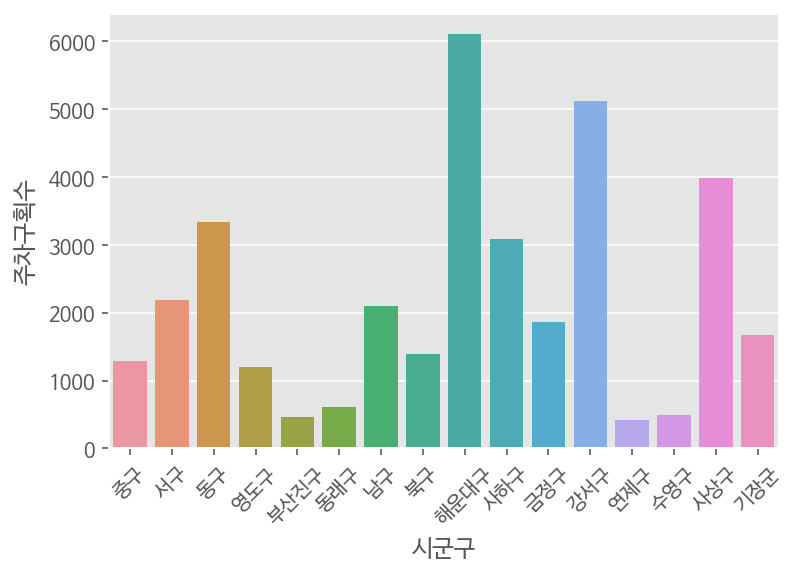

In [ ]:
# 구별 주차구획수
plt.xticks(rotation=45)
sns.barplot(x = pd_data1['시군구'], y = pd_data1['주차구획수'])

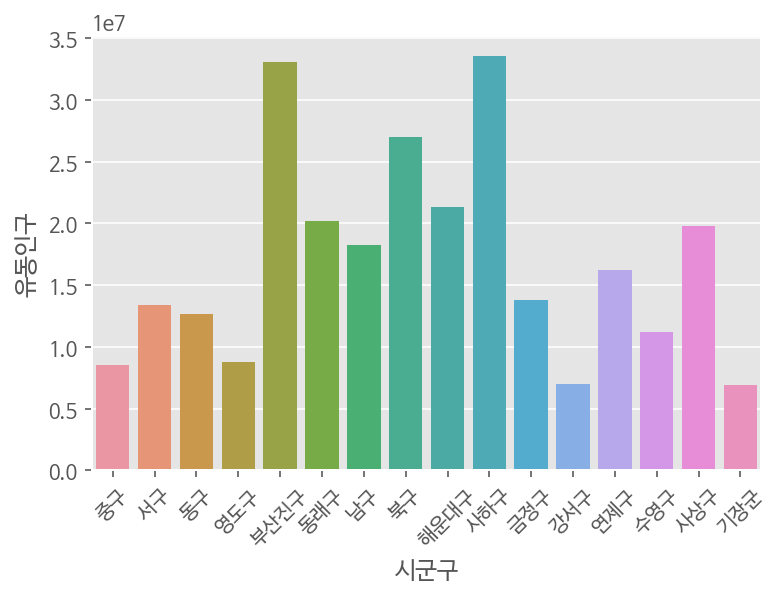

In [ ]:
# 구별 유동인구
plt.xticks(rotation=45)
sns.barplot(x = pd_data1['시군구'], y = pd_data1['유동인구'])

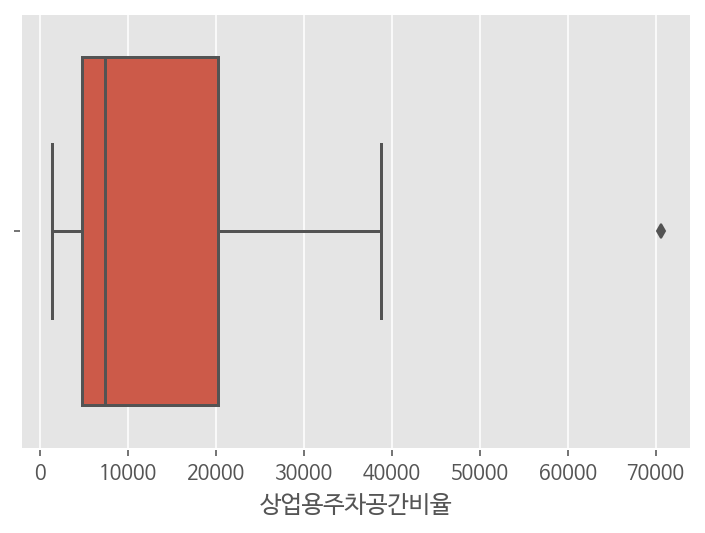

In [ ]:
# boxplot (이상치 : 서면)
sns.boxplot(x=pd_data1['상업용주차공간비율'])

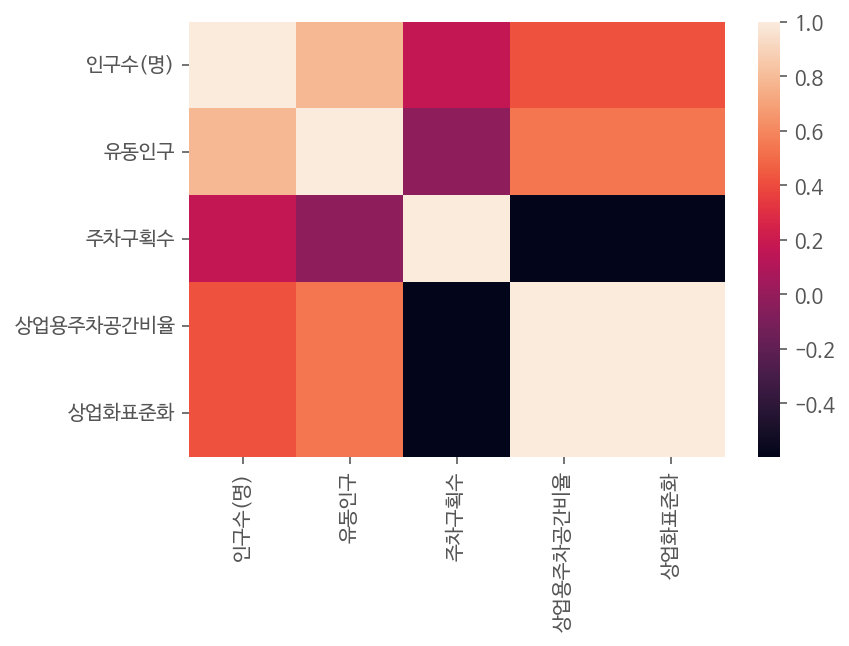

In [ ]:
sns.heatmap(pd_data1_c)

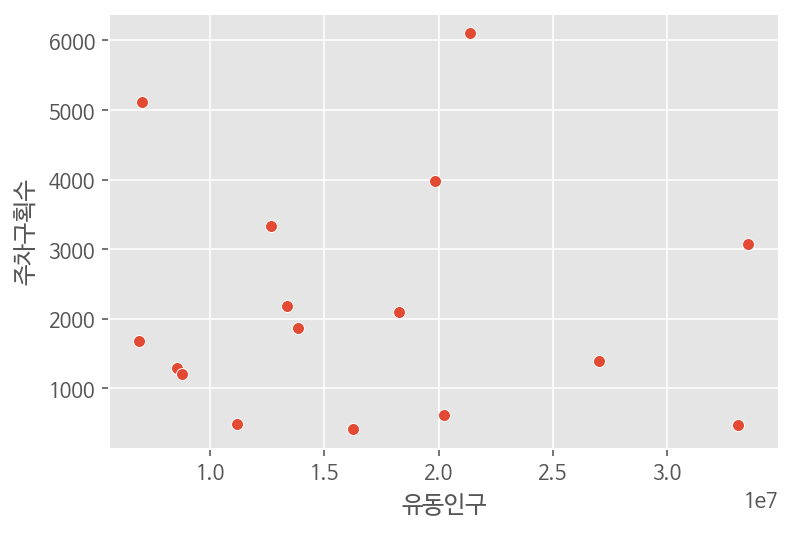

In [ ]:
# scatter plot (주차구획수와 유동인구 간 관계성)
sns.scatterplot(x=pd_data1['유동인구'],y=pd_data1['주차구획수'])

# 유동인구가 증가한다고 해서 주차구획수가 증가하는 경향을 보이지 않음.

# 주거용 주차장

In [ ]:
pd_data2 = pd_data.copy()
pd_data2.reset_index(inplace=True)
x = pd_data2['시군구']
y = pd_data2['인구수(명)']
print(pd_data2)

     시군구  인구수(명)      유동인구  주차구획수
0     중구   42609   8547196   1294
1     서구  107143  13366028   2185
2     동구   89712  12651803   3332
3    영도구  112451   8793333   1204
4   부산진구  355902  33097664    469
5    동래구  268004  20218844    616
6     남구  267422  18246086   2101
7     북구  285390  27013541   1392
8   해운대구  401131  21364235   6099
9    사하구  310195  33534918   3080
10   금정구  231996  13824783   1861
11   강서구  147347   7030906   5121
12   연제구  208050  16231884    419
13   수영구  176812  11185594    488
14   사상구  212771  19821685   3977
15   기장군  179174   6911320   1675


Text(0.5, 1.0, '구군별 인구수(인구)')

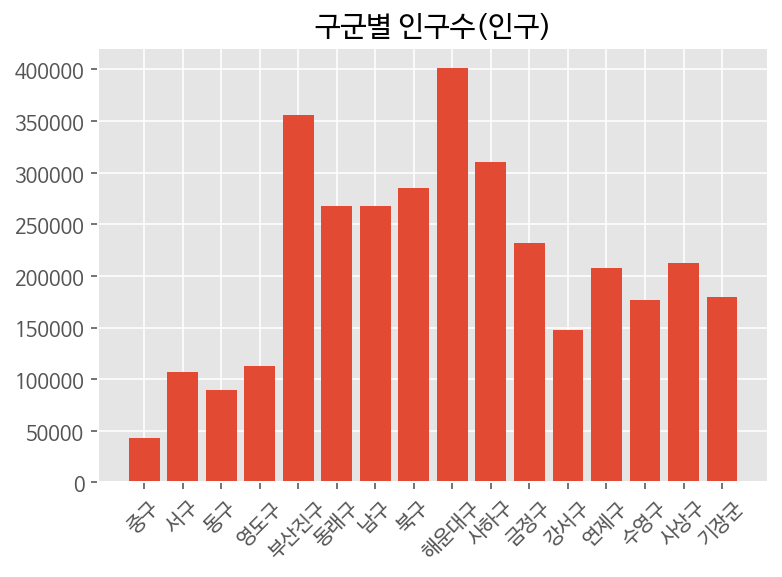

In [ ]:
f = plt.figure()
a = f.add_subplot(1,1,1)

a.bar(x,y)
a.set_xticklabels(x,rotation=45)
a.set_title('구군별 인구수(인구)')

In [ ]:
# 주차공간 비율
pd_data2['주거용주차공간비율'] = round((pd_data2['인구수(명)']/pd_data2['주차구획수']))

# 표준화
pd_data2['주거용표준화'] = (pd_data2['주거용주차공간비율'] - pd_data2['주거용주차공간비율'].mean())/pd_data2['주거용주차공간비율'].std()

# 상관관계
pd_data2_c = pd_data2.corr()

In [ ]:
# 정규화
pd_data2['정규화'] = ((pd_data2['주거용주차공간비율'] - pd_data2['주거용주차공간비율'].mean())/pd_data2['주거용주차공간비율'].std())
print(pd_data2)

# 상관관계
pd_data2_c = pd_data2.corr()

     시군구  인구수(명)      유동인구  주차구획수  주거용주차장비율  주거용주차공간비율    주거용표준화       정규화
0     중구   42609   8547196   1294      33.0       33.0 -0.750823 -0.750823
1     서구  107143  13366028   2185      49.0       49.0 -0.675180 -0.675180
2     동구   89712  12651803   3332      27.0       27.0 -0.779190 -0.779190
3    영도구  112451   8793333   1204      93.0       93.0 -0.467159 -0.467159
4   부산진구  355902  33097664    469     759.0      759.0  2.681512  2.681512
5    동래구  268004  20218844    616     435.0      435.0  1.149726  1.149726
6     남구  267422  18246086   2101     127.0      127.0 -0.306416 -0.306416
7     북구  285390  27013541   1392     205.0      205.0  0.062347  0.062347
8   해운대구  401131  21364235   6099      66.0       66.0 -0.594808 -0.594808
9    사하구  310195  33534918   3080     101.0      101.0 -0.429337 -0.429337
10   금정구  231996  13824783   1861     125.0      125.0 -0.315872 -0.315872
11   강서구  147347   7030906   5121      29.0       29.0 -0.769734 -0.769734
12   연제구  208050  1623188

In [ ]:
# 신뢰구간
max95 = pd_data2['주거용주차공간비율'].mean() + ((1.96 * pd_data2['주거용주차공간비율'].std()) / 4)
min95 = pd_data2['주거용주차공간비율'].mean() - ((1.96 * pd_data2['주거용주차공간비율'].std()) / 4)
print("min95 : ", min95)
print("max95 : ", max95)

for i,n in enumerate(pd_data2['주거용주차공간비율']) :
  if n >= min95 and n <= max95 :
    print(pd_data2.loc[i])
    

min95 :  88.16879794218079
max95 :  295.4562020578192
시군구               영도구
인구수(명)         112451
유동인구          8793333
주차구획수            1204
주거용주차장비율         93.0
주거용주차공간비율        93.0
주거용표준화      -0.467159
정규화         -0.467159
Name: 3, dtype: object
시군구                남구
인구수(명)         267422
유동인구         18246086
주차구획수            2101
주거용주차장비율        127.0
주거용주차공간비율       127.0
주거용표준화      -0.306416
정규화         -0.306416
Name: 6, dtype: object
시군구                북구
인구수(명)         285390
유동인구         27013541
주차구획수            1392
주거용주차장비율        205.0
주거용주차공간비율       205.0
주거용표준화       0.062347
정규화          0.062347
Name: 7, dtype: object
시군구               사하구
인구수(명)         310195
유동인구         33534918
주차구획수            3080
주거용주차장비율        101.0
주거용주차공간비율       101.0
주거용표준화      -0.429337
정규화         -0.429337
Name: 9, dtype: object
시군구               금정구
인구수(명)         231996
유동인구         13824783
주차구획수            1861
주거용주차장비율        125.0
주거용주차공간비율       125.0
주거용표준화      -0.315

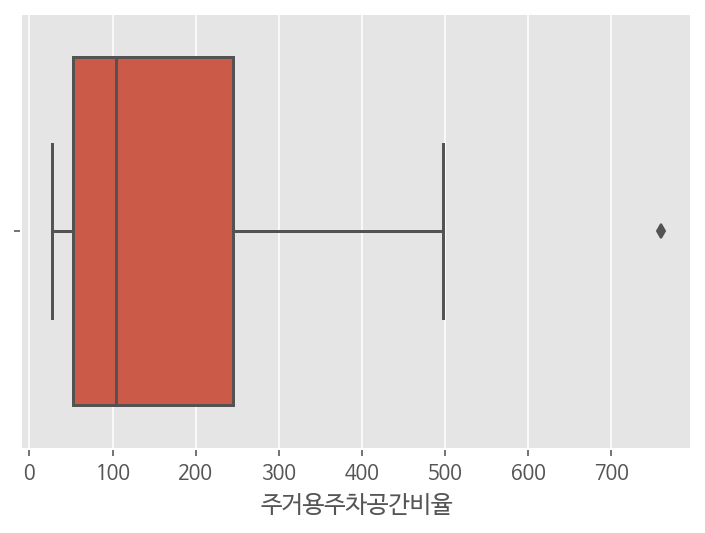

In [ ]:
sns.boxplot(x = pd_data2['주거용주차공간비율'])

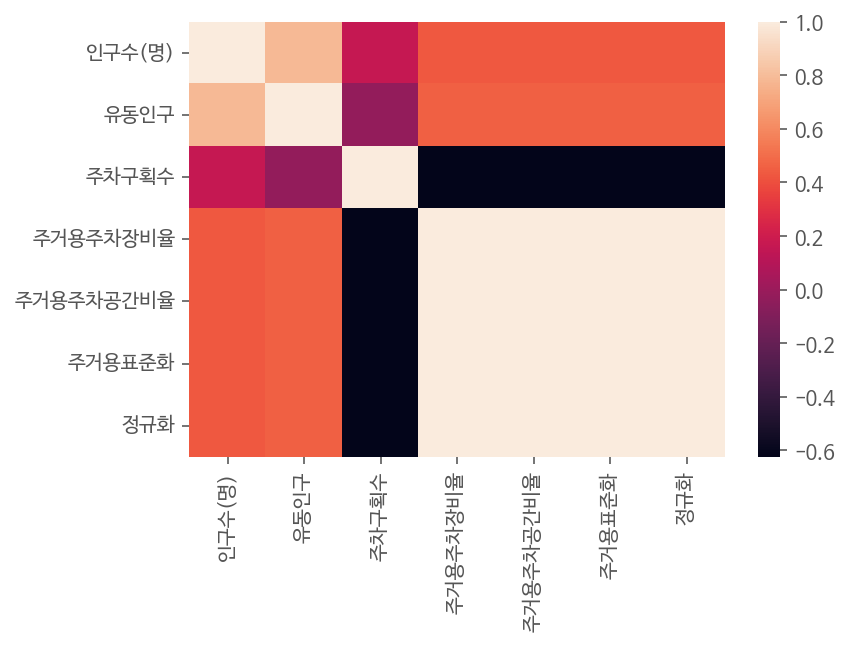

In [ ]:
sns.heatmap(pd_data2_c)

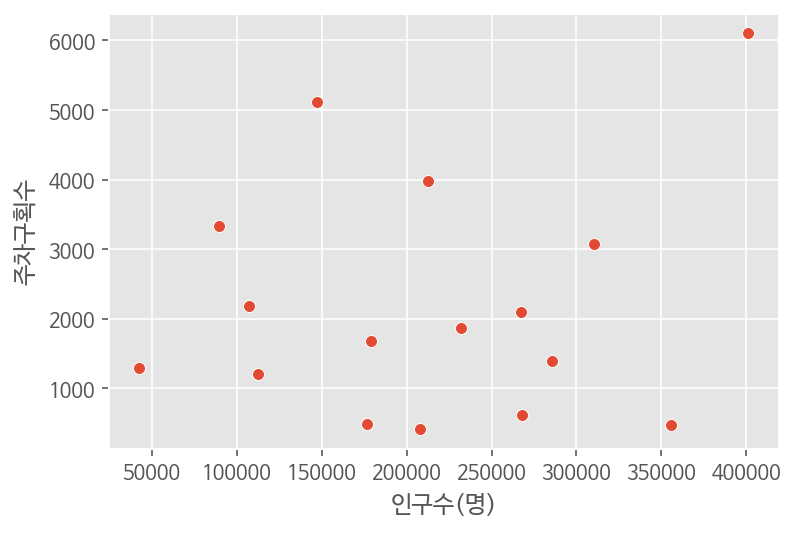

In [ ]:
# scatter plot (주차구획수와 인구수(명) 간 관계성)
sns.scatterplot(x=pd_data2['인구수(명)'],y = pd_data2['주차구획수'])

# 세대수(세대)가 증가한다고 해서 주차구획수가 증가하는 경향을 보이지 않음.

# 결론

([<matplotlib.patches.Wedge at 0x7f61345ce590>,
 [Text(1.0962457987903953, 0.09080280080706855, '중구'),
  Text(1.0679335633040272, 0.26366248191345576, '서구'),
  Text(1.0269760916736057, 0.3941067204841934, '동구'),
  Text(0.9620934834907103, 0.5332692837813842, '영도구'),
  Text(0.09287717424776273, 1.0960720006020366, '부산진구'),
  Text(-1.0320874615557898, 0.380520001707304, '동래구'),
  Text(-1.0840429839728953, -0.1866837135347941, '남구'),
  Text(-0.9521871249598667, -0.5507628156118234, '북구'),
  Text(-0.7560650997169486, -0.7989778250927875, '해운대구'),
  Text(-0.5996617891121712, -0.9221744621701418, '사하구'),
  Text(-0.3727611819496759, -1.0349150212609153, '금정구'),
  Text(-0.25530487774663635, -1.0699623448508715, '강서구'),
  Text(0.29521202280613756, -1.0596461020504482, '연제구'),
  Text(0.9542034801634433, -0.5472620199173094, '수영구'),
  Text(1.0844907114056868, -0.1840649257050015, '사상구'),
  Text(1.0984728343339323, -0.057943353634197683, '기장군')])

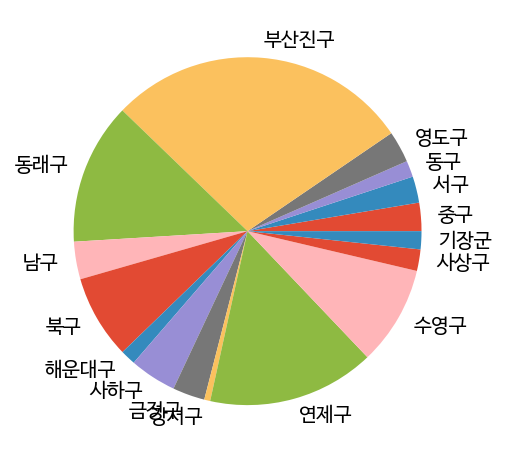

In [ ]:
#print(adress)
#print(gp)
pd_data['구별인구'] = pd_data1['유동인구']+pd_data2['인구수(명)']

#구별인구비율
plt.rcParams['figure.figsize']=(5,4)
plt.rcParams['font.size']=10
pd_data['구별인구비율'] = round((pd_data['구별인구']/pd_data['주차구획수']))
pd_data.reset_index(inplace=True)
pd_data.dropna()
plt.pie(pd_data['구별인구비율'],labels=pd_data['시군구'])

#인구 대비 부산 진구에 주차장이 많고, 부산 강서구에 주차장이 적음

           index    인구수(명)      유동인구     주차구획수      구별인구    구별인구비율       정규화
index   1.000000  0.269893 -0.052620  0.152648 -0.049007 -0.067160 -0.067160
인구수(명)  0.269893  1.000000  0.787452  0.167862  0.791839  0.423026  0.423026
유동인구   -0.052620  0.787452  1.000000 -0.023258  0.999974  0.538649  0.538649
주차구획수   0.152648  0.167862 -0.023258  1.000000 -0.021098 -0.595944 -0.595944
구별인구   -0.049007  0.791839  0.999974 -0.021098  1.000000  0.538622  0.538622
구별인구비율 -0.067160  0.423026  0.538649 -0.595944  0.538622  1.000000  1.000000
정규화    -0.067160  0.423026  0.538649 -0.595944  0.538622  1.000000  1.000000
min95 :  6695.946018656272
max95 :  24846.553981343728
index            3
시군구            영도구
인구수(명)      112451
유동인구       8793333
주차구획수         1204
구별인구       8905784
구별인구비율      7397.0
정규화      -0.452148
Name: 3, dtype: object
index            6
시군구             남구
인구수(명)      267422
유동인구      18246086
주차구획수         2101
구별인구      18513508
구별인구비율      8812.0
정규화      -0.375749
Na

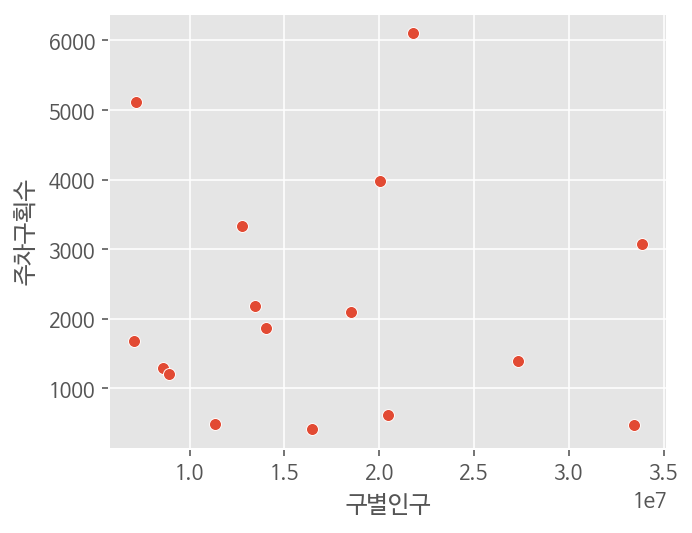

In [ ]:
# 정규화
pd_data['정규화'] = ((pd_data['구별인구비율'] - pd_data['구별인구비율'].mean())/pd_data['구별인구비율'].std())

# 상관관계
pd_data_c = pd_data.corr()

# 신뢰구간
max95 = pd_data['구별인구비율'].mean() + ((1.96 * pd_data['구별인구비율'].std()) / (len(pd_data))**(0.5))
min95 = pd_data['구별인구비율'].mean() - ((1.96 * pd_data['구별인구비율'].std()) / (len(pd_data))**(0.5))
print("min95 : ", min95)
print("max95 : ", max95)

for i,n in enumerate(pd_data['구별인구비율']) :
  if n >= min95 and n <= max95 :
    pd_data.loc[i]
# 영도구, 남구, 북구, 사하구, 금정구, 수영구가 95% 신뢰구간 안에 있음

sns.scatterplot(x=pd_data['구별인구'],y=pd_data['주차구획수'])

# 구별인구수가 증가한다고 해서 주차구획수가 증가하는 경향을 보이지 않음.
# 유동인구와 인구수에 맞게 구별로 주차구획수를 늘리는 방안이 필요해 보임. 